# Web Scraping from Ynet with Python

In [ ]:
#installing pandas libraries
!pip install pandas-datareader 
!pip install --upgrade html5lib==1.0b8  

#There is a bug in the latest version of html5lib so install an earlier version
#Restart kernel after installing html5lib

In [3]:
#import libraries
import requests
from bs4 import BeautifulSoup,Comment
from lxml.etree import fromstring
import urllib.request
import json
import pandas as pd #pandas library
from pandas_datareader import data #data readers (google, html, etc.)
#The following line ensures that graphs are rendered in the notebook (and not in another window)
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt #Plotting library
import datetime as dt #datetime for timeseries support

In [230]:
#Get article links from YNET and return in list
def get_article_links(home_page_url):
    url_site="https://www.ynet.co.il/"
    url=[]
    response = requests.get(home_page_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    article_links = soup.find_all('a', class_="mta_title")
    for link in article_links:
        if 'http' not in link.get('href'):
            url.append(url_site+link.get('href'))
        elif 'frogi'  not in link.get('href') : #exclde other sites
            url.append(link.get('href'))
    return url 


get_article_links("https://www.ynet.co.il/")


['https://www.ynet.co.il//article/B1ZwbPTWv#autoplay',
 'https://www.ynet.co.il//article/SJiQ0PTbw',
 'https://www.ynet.co.il//article/BySburp11w',
 'https://www.ynet.co.il//article/S14Jh00T11v',
 'https://www.ynet.co.il//article/SJ10uFnWD',
 'https://www.ynet.co.il//article/ryzGOvpbv',
 'https://www.ynet.co.il//article/ryQAc8T11w',
 'https://www.ynet.co.il//sport/article/rkoapj5bP#autoplay',
 'https://www.ynet.co.il//sport/worldsoccer/article/H100d3KabP',
 'https://www.ynet.co.il//sport/worldsoccer/article/ByRX6OT11P',
 'https://www.ynet.co.il//sport/israelisoccer/article/SJrVeQTWD',
 'https://www.ynet.co.il//sport/article/ByXP5jF11P',
 'https://www.ynet.co.il//sport/article/SyuOiuhZv',
 'https://www.ynet.co.il//sport/article/r1y7HF2WP',
 'https://www.ynet.co.il//economy/article/r1CUbKTWw',
 'https://www.ynet.co.il//economy/article/rkoExF6bw',
 'https://www.ynet.co.il//economy/article/SktBHFabP',
 'https://www.ynet.co.il//economy/article/ry7xULa11w',
 'https://www.ynet.co.il//economy/

In [244]:
#Get article tags from YNET and return it in list
def get_article_tags(url):
    tags=[]
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    url_tag = soup.find_all('div', class_="tagName")
    url_tag2=soup.find_all('a', class_="articletags_link")
    #if no tags return null value
    if len(url_tag) == 0 and len(url_tag2) == 0:
        return 'null'
    try:   
        if len(url_tag) == 0:    
            for tag in url_tag2:
                tag=tag['href'].rsplit('/', 1)[-1]
                tags.append(tag)
            return tags    
        elif len(url_tag) != 0:
             for tag in url_tag:
                tags.append(tag.get_text())
        
             return tags
        
        else:
            return 'null'
        
    except:
        return 'null'


            

  

get_article_tags("https://www.ynet.co.il//judaism/article/HJAbsxaZP")


['חתונה', 'ירושלים', 'קורונה', 'הפגנות', 'בעלז']

In [232]:
#Q3 - Get article_talkbacks from YNET using api and return list of dictionarys
def get_article_talkbacks(url):
    #Find the ID of the URL 
    right_url=url.rsplit('/', 1)[-1].strip('#autoplay')
    
    #if No talkback return zero object
    zero= [{'Body': '','Like': 0,'Dislike': 0,'ID': right_url }]
    #Exclude URL Id's who have dots in it(.)
    if '.' not in  right_url:
    
        fix_url="https://www.ynet.co.il/iphone/json/api/talkbacks/list/%s/end_to_start/1" % (right_url)
        response = requests.get(fix_url).json() 
        dic=dict()
        body=list()
        lis = list()
       
        try:
            for i in response ["rss"]["channel"]["item"]:
                dic["Body"]=i['text']
                dic["Like"]=i['likes']
                dic["Dislike"]=i['unlikes']
                dic["ID"]=right_url
                
                dictionary_copy = dic.copy()
                lis.append(dictionary_copy)
          
            #body.append(i['text'])
            df=pd.DataFrame.from_dict(lis)
    
            return lis
    
        except:
            return zero
    else:
        return zero

h=get_article_talkbacks('https://www.ynet.co.il//articles/0,7340,L-5767587,00.html')
h


[{'Body': '', 'Like': 0, 'Dislike': 0, 'ID': '0,7340,L-5767587,00.htm'}]

In [233]:
#get article published date  for Q4a
def get_article_date(url):
    
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    url_date = soup.find('div', class_="date")
    try:
        return url_date.get_text()
    except:
        return current_time()
   
get_article_date("https://www.ynet.co.il/article/H1lngWDWP#autoplay ") 

'עודכן: 04.08.20 ,  20:54 '

In [234]:
#Get current time for the Crawler for Q4a
import datetime #import datetime libray
 #get the current datetime
def current_time():
    now = datetime.datetime.now()
    return now

In [235]:
#Get article header for Q4a
def get_article_header(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    url_header = soup.find('h1', class_="mainTitle")
    try:
        return url_header.get_text()
    except:
        try:
            return soup.find('h1', class_="art_header_title").get_text()
        except:
            try:
                return soup.find('h1', class_="ahxnet_title cp-color cp-big-h1").get_text()
            except:
                return 'error'
            
get_article_header("https://www.ynet.co.il//judaism/article/HJAbsxaZP")

'הקורונה הכריעה: קודם דמוקרטית - ואז יהודית'

In [219]:
# Using realated functions in order to create
#panda dataframe named articles and panda dataframe named talkbacks
article_links=get_article_links("https://www.ynet.co.il/")
new_tags=[]
new_comment=[]
article_date=[]
time=[]
article_header=[]
article_comment=[]
article_url=[]
for article in article_links:
  
    new_tags.append(get_article_tags(article))
    article_date.append(get_article_date(article))
    time.append(current_time())
    article_header.append(get_article_header(article))
    article_comment=article_comment+(get_article_talkbacks(article))  
    article_url.append(article.rsplit('/', 1)[-1].strip('#autoplay'))
    
   
#pd dataframe named articles
articles = pd.DataFrame ( {'tags': new_tags, 'enter time': time, 
                         'article title': article_header,'article_date':article_date,'ID':article_url} )
articles

,tags,enter time,article title,article_date,ID
0,"[פיגוע, טרור]",2020-08-09 17:12:13.188608,עשור אחרי: מחבל מואשם במעורבות בפיגוע שבו נהרג...,"פורסם: 09.08.20 , 13:05",BySburp11w
1,"[בלון תבערה, עוטף עזה, עזה]",2020-08-09 17:12:16.273405,שוב הפרחות בלוני תבערה מעזה: שריפות פרצו בעוטף,"פורסם: 09.08.20 , 16:47",S14Jh00T11v
2,"[חינוך, עזה, לימודים]",2020-08-09 17:12:18.792027,"קפסולות, ריחוק ומדידות חום: מערכת החינוך בעזה ...","פורסם: 09.08.20 , 16:41",ryRsNvp11P
3,"[כפר סבא, הריגה]",2020-08-09 17:12:21.726031,3 חודשי מאסר לספיר ניסני ששפכה שמן רותח על אמה...,"פורסם: 09.08.20 , 13:43",SJ10uFnWD
4,"[הליכוד, בנימין נתניהו, ממשלה, כחול לבן, בני גנץ]",2020-08-09 17:12:24.536072,גורמים משפטיים: הליכוד לא יוכל להשתמש ברוב בממ...,"פורסם: 09.08.20 , 16:05",ryzGOvpbv
...,...,...,...,...,...
71,"[psakdin.co.il, חוק_ונדלן, נדל""ן, הפקעת_קרקעות...",2020-08-09 17:16:03.175494,קרקע הופקעה ב-78' - המדינה תפצה יורשים,2020-08-09 17:16:03.175494,"0,7340,L-5776976,00.htm"
72,null,2020-08-09 17:16:06.752688,הורוסקופ שבועי 15-9.8,2020-08-09 17:16:06.752688,"0,7340,L-4503632,00.htm"
73,null,2020-08-09 17:16:10.821241,יש מי ששומע אתכם: המשברים שחיזקו אותי,2020-08-09 17:16:10.821241,"0,7340,L-5775270,00.htm"
74,"[עסקים, קורונה, מקפצה לדיגיטל]",2020-08-09 17:16:14.243486,קורונה Time: שינויים קטנים שיעשו לעסק הבדל גדול,"פורסם: 09.08.20 , 12:04",SJRHXNp11D


In [220]:
#create pd dataframe named talkbacks
talkbacks=pd.DataFrame(article_comment)
talkbacks

,Body,Like,Dislike,ID
0,,6,3,BySburp11w
1,מדינה מפגרת,20,1,BySburp11w
2,,9,3,BySburp11w
3,,10,3,BySburp11w
4,,7,0,BySburp11w
...,...,...,...,...
881,,0,0,"0,7340,L-5776976,00.htm"
882,,0,0,"0,7340,L-4503632,00.htm"
883,,0,0,"0,7340,L-5775270,00.htm"
884,,0,0,SJRHXNp11D


In [236]:
# for each report Calculate total comments,LIkes and Dislikes
#total comments
total_comments=talkbacks.groupby('ID')['Body'].count()
#total likes
total_likes=talkbacks.groupby('ID')['Like'].sum()
#total dislikes
total_dislikes=talkbacks.groupby('ID')['Dislike'].sum()
print(total_comments)
print(total_dislikes)
print(total_likes)

ID
0,7340,L-4503632,00.htm     1
0,7340,L-5760891,00.htm     1
0,7340,L-5767587,00.htm     1
0,7340,L-5770126,00.htm     1
0,7340,L-5774657,00.htm     1
                           ..
ry8WF11TWD                  1
ryQAc8T11w                 31
ryRsNvp11P                  1
ryTenYKZw                  29
ryzGOvpbv                  11
Name: Body, Length: 76, dtype: int64
ID
0,7340,L-4503632,00.htm     0
0,7340,L-5760891,00.htm     0
0,7340,L-5767587,00.htm     0
0,7340,L-5770126,00.htm     0
0,7340,L-5774657,00.htm     0
                           ..
ry8WF11TWD                  0
ryQAc8T11w                 71
ryRsNvp11P                  0
ryTenYKZw                  69
ryzGOvpbv                   9
Name: Dislike, Length: 76, dtype: int64
ID
0,7340,L-4503632,00.htm      0
0,7340,L-5760891,00.htm      0
0,7340,L-5767587,00.htm      0
0,7340,L-5770126,00.htm      0
0,7340,L-5774657,00.htm      0
                          ... 
ry8WF11TWD                   0
ryQAc8T11w                 294
ryRsNv

tags
קורונה               14
בנימין נתניהו         3
בני גנץ               3
סופר יודה             2
סין                   2
עסקים                 2
הרב עדין שטיינזלץ     2
עזה                   2
מיקרוסופט             2
מעורבות               2
Name: tags, dtype: int64


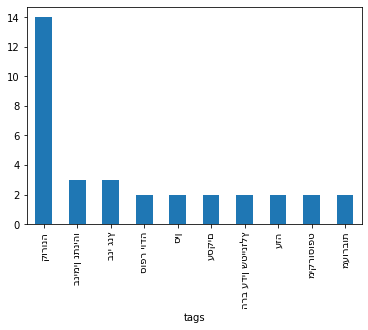

In [239]:
#find most frequent tag

#Transform each tag of a list-like to a row
articles_tags=articles.explode('tags')
#To Pretiffy the data we remove null values
articles_tags=articles_tags[articles_tags.tags != 'null']
#Find top 10 frequent tag
common_tags=articles_tags.groupby('tags')['tags'].count().sort_values(ascending=False).head(10)
print(common_tags)
common_tags.plot.bar()
plt.show()

In [241]:
#Find  most frequent talkbacks -The top 10
#Merge talkbacks and articles pandas df with left join operation
df_merge= pd.merge(talkbacks, articles, on='ID', how='left')
df_merge
#Show most frequent talkbacks  with the title-The top 10
max_comment=df_merge.groupby('article title')['Body'].count().sort_values(ascending=False)
max_comment.head(10)

article title
אלה איילון: "הייתי אדם בודד. הדוגמנות הצילה אותי"                                 100
אסף ליס: "היו לנו 400 עובדים ונשארנו עם 60"                                       100
פחד לא יעצור אותי: להיות קורבן של טרור פוליטי                                     100
הרב עדין שטיינזלץ נטמן: "אבידה עצומה לעולם היהודי"                                 66
"התביישתי להביא חברות הביתה"                                                       62
בכירים במשק לממשלה: "העבירו את התקציב עד תום 2021 מיידית"                          46
העימות הבא: החוק שימנע מנאשם להרכיב ממשלה                                          31
עשור אחרי: מחבל מואשם במעורבות בפיגוע שבו נהרגו אלירז פרץ ואילן סביאטקובסקי        30
מנכ"לית סופרבוס: "לא נוסעת באוטובוסים, והמדינה צריכה לדאוג שתהיה לי אלטרנטיבה״     29
הרב עדין שטיינזלץ נפטר: "רש"י בן זמננו"                                            26
Name: Body, dtype: int64

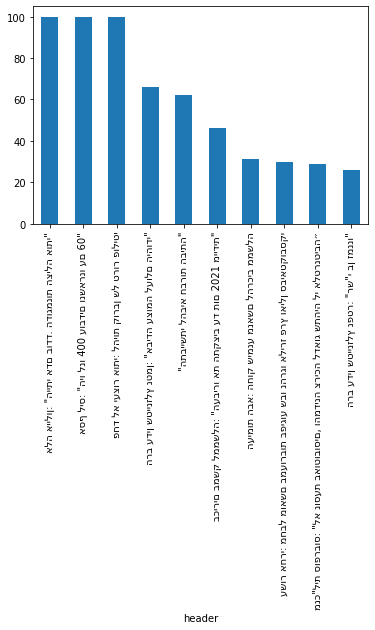

In [242]:
# Present above section in bar chart
max_comment.head(10).plot.bar()
plt.xlabel('header')
plt.xticks(rotation=90)
plt.show()

In [243]:
#Save dataframes as CSV file
articles.to_csv(r'C:\Users\Alon2\Documents\Python\final_assighment\articles.csv', encoding='utf-8-sig' )
talkbacks.to_csv(r'C:\Users\Alon2\Documents\Python\final_assighment\talkbacks.csv', encoding='utf-8-sig' )